<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/PrincipiosDeProbabilidad/Semana2/Notebooks/Distribuci%C3%B3n_Multinomial%2C_momentos%2C_covarianza_y_correlacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import multinomial
from scipy.stats import kurtosis, skew  # curtosis y asimetría

In [58]:
n= 25
N = 2300
k = 3

# La suma de las probabilidades cada clase k,  debe sumar 1
p_vec = [0.5, 0.38, 0.12]
nombres_col = ['A', 'B', 'C']

df = pd.DataFrame(multinomial.rvs(n = n, p=p_vec, size = N),
                  columns = nombres_col)
df

,A,B,C
0,13,11,1
1,9,13,3
2,11,11,3
3,9,12,4
4,15,7,3
...,...,...,...
2295,13,7,5
2296,14,9,2
2297,11,12,2
2298,9,14,2


# Media Aritmética

> Bloc con sangría



$\bar{x} =\dfrac{1}{n} \displaystyle\sum_{i=1}^n x_i$

In [52]:
def media(df, col):
  N = len(df)
  sumatoria = df[col].sum()
  return sumatoria/N

media(df, 'A')

8.264347826086956

# Varianza

$\mathrm{Var}(X) =\dfrac{1}{n} \displaystyle\sum_{i=1}^n (x_i-\bar{x})^2$

In [24]:
def varianza(df, col):
  n = len(df)
  col_media =  media(df, col)
  sumatoria = ((df[col] - col_media)**2).sum()
  return sumatoria/n
varianza(df, 'A')

1.5099959999999997

# Histógramas

array([[<Axes: title={'center': 'A'}>, <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'C'}>, <Axes: >]], dtype=object)

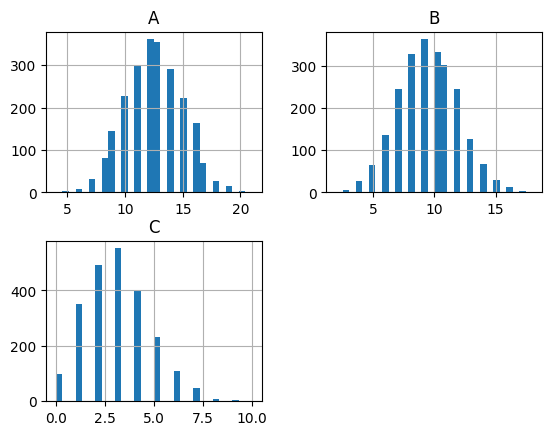

In [59]:
df.hist(bins=30)

In [60]:
kurtosis(df['A'] ), skew(df['A'])

(-0.18936043039178152, 0.01620703477084637)

In [61]:
kurtosis(df['B']), skew(df['B'])

(-0.19172241388610667, 0.1100774364172033)

In [62]:
kurtosis(df['C']), skew(df['C'])

(0.1308035693110181, 0.4846259105205692)

# Covarianza

$\mathrm{cov}(X, Y) =\dfrac{1}{n} \displaystyle\sum_{i=1}^n (x_i-\bar{x}) (x_i-\bar{y})$

In [63]:
def covarianza(df, col1 = str, col2=str):
  '''Covarianza entre dos columnas de un DataFrame'''
  mean_1 = media(df, col1)
  mean_2 = media(df, col2)
  sumatoria = ((df[col1]  - mean_1) * (df[col2] - mean_2)).sum()
  return sumatoria/len(df)
covarianza(df, 'A', 'C')

-1.5775712665406427

In [64]:
# Matriz de covarianza
df.cov()

,A,B,C
A,6.211824,-4.633567,-1.578257
B,-4.633567,5.808040,-1.174473
C,-1.578257,-1.174473,2.752730


# Correlación
$\mathrm{corr}(X,Y) = \dfrac{\mathrm{cov}(X, Y)}{\sigma_x\sigma_y}$

In [65]:
# la correlación se calcula dividiendo la covarianza entre dos variables entre el producto de sus desviaciones estándar

def correlacion(df , col1=str, col2=str):
  cov = covarianza(df, col1, col2)
  producto_desviaciones = np.sqrt(varianza(df, col1)) * np.sqrt(varianza(df,col2))
  return cov/producto_desviaciones

correlacion(df, 'A', 'C')

-0.3816686157013592

In [66]:
df.corr()

,A,B,C
A,1.000000,-0.771420,-0.381669
B,-0.771420,1.000000,-0.293729
C,-0.381669,-0.293729,1.000000
